In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
%matplotlib inline

In [3]:
%%time
mydata=pd.read_csv('NY property data.csv')

CPU times: user 4.87 s, sys: 704 ms, total: 5.57 s
Wall time: 5.46 s


In [5]:
mydata.shape

(1070994, 32)

In [7]:
numrecords=len(mydata)
numrecords

1070994

In [8]:
mydata.dtypes

RECORD        int64
BBLE         object
B             int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [9]:
mydata.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
RECORD,1,2,3,4,5,6,7,8,9,10
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001,1000030002,1000030003,1000030010,1000041001,1000041002
B,1,1,1,1,1,1,1,1,1,1
BLOCK,1,1,2,2,3,3,3,3,4,4
LOT,101,201,1,23,1,2,3,10,1001,1002
EASEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION,PARKS AND RECREATION,PARKS AND RECREATION,DEPT RE-CITY OF NY,"TRZ HOLDINGS, LLC","TRZ HOLDINGS, LLC"
BLDGCL,P7,Z9,Y7,T2,Q1,Q1,Q1,Z9,R5,R5
TAXCLASS,4,4,4,4,4,4,4,4,4,4
LTFRONT,500,27,709,793,323,496,180,362,0,0


In [12]:
mydata.tail(10).transpose()

,1070984,1070985,1070986,1070987,1070988,1070989,1070990,1070991,1070992,1070993
RECORD,1070985,1070986,1070987,1070988,1070989,1070990,1070991,1070992,1070993,1070994
BBLE,5080500065,5080500068,5080500072,5080500076,5080500078,5080500083,5080500086,5080500089,5080500092,5080500094
B,5,5,5,5,5,5,5,5,5,5
BLOCK,8050,8050,8050,8050,8050,8050,8050,8050,8050,8050
LOT,65,68,72,76,78,83,86,89,92,94
EASEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWNER,THOMAS BROWN,DEBRA AMAROSO,JOSEPH R GLORIA,DENNIS EMPEROR,"CHIU, ANNE","TOBIN, GALE",SHERRI MILINAZZO,JOHN GERVASI,RITA M MOOG,EDWARD DONOHUE
BLDGCL,A1,A1,A1,A1,A3,A1,A1,A1,A1,A1
TAXCLASS,1,1,1,1,1,1,1,1,1,1
LTFRONT,60,75,75,33,103,60,62,53,52,50


In [13]:
mydata.describe()

,RECORD,B,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,...,EXTOT,EXCD1,ZIP,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.014730e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,638488.000000,1.041104e+06,1.070994e+06,1.070994e+06,2.827260e+05,2.827320e+05,8.744900e+04,1.308280e+05,92948.000000
mean,5.354975e+05,3.215427e+00,4.757239e+03,3.647221e+02,3.663530e+01,8.886159e+01,5.006918e+00,8.742645e+05,8.506792e+04,2.272382e+05,...,9.118698e+04,1602.014232,1.092396e+04,2.304277e+01,3.992284e+01,2.462357e+05,7.139114e+05,3.512357e+05,6.567683e+05,1364.041679
std,3.091695e+05,1.201197e+00,3.676579e+03,8.532152e+02,7.403284e+01,7.639628e+01,8.365707e+00,1.158243e+07,4.057260e+06,6.877529e+06,...,6.508403e+06,1384.226741,5.284208e+02,3.557970e+01,4.270715e+01,6.178963e+06,1.165253e+07,1.080221e+07,1.607251e+07,1094.705653
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1010.000000,1.000100e+04,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,1011.000000
25%,2.677492e+05,3.000000e+00,1.555000e+03,2.300000e+01,1.900000e+01,8.000000e+01,2.000000e+00,3.040000e+05,9.180000e+03,1.837400e+04,...,0.000000e+00,1017.000000,1.031400e+04,1.500000e+01,2.600000e+01,5.705000e+03,3.391200e+04,2.090000e+03,2.870000e+03,1017.000000
50%,5.354975e+05,3.000000e+00,4.047000e+03,4.900000e+01,2.500000e+01,1.000000e+02,2.000000e+00,4.470000e+05,1.367800e+04,2.534000e+04,...,1.620000e+03,1017.000000,1.121400e+04,2.000000e+01,3.900000e+01,2.014500e+04,7.996250e+04,3.048000e+03,3.706200e+04,1017.000000
75%,8.032458e+05,4.000000e+00,6.898000e+03,1.430000e+02,4.000000e+01,1.000000e+02,3.000000e+00,6.190000e+05,1.974000e+04,4.543800e+04,...,2.090000e+03,1017.000000,1.136400e+04,2.400000e+01,5.000000e+01,6.264000e+04,2.405510e+05,3.177900e+04,1.068408e+05,1017.000000
max,1.070994e+06,5.000000e+00,1.635000e+04,9.978000e+03,9.999000e+03,9.999000e+03,1.190000e+02,6.150000e+09,2.668500e+09,4.668309e+09,...,4.668309e+09,7170.000000,3.380300e+04,7.575000e+03,9.393000e+03,2.371005e+09,4.501180e+09,2.371005e+09,4.501180e+09,7160.000000


In [14]:
mydata.count()

RECORD      1070994
BBLE        1070994
B           1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

In [101]:
mydata['BBLE'].min()

'1000010101'

In [5]:
mydata[mydata['owner']=='John']

KeyError: 'owner'

In [102]:
len(mydata['BBLE'].unique())

1070994

In [103]:
len(mydata['LOT'].unique())

6366

In [17]:
mydata['B'].unique()

array([1, 2, 3, 4, 5])

In [18]:
mydata['B'].value_counts()

4    358046
3    323243
1    146220
5    136200
2    107285
Name: B, dtype: int64

In [19]:
mydata['BLOCK'].value_counts()

3944     3888
16       3786
3943     3424
3938     2794
1171     2535
3937     2275
1833     1774
2450     1651
1047     1480
7279     1302
5893     1295
8720     1281
936      1151
1115     1090
1320     1049
1140     1017
1011      991
943       946
1116      881
1515      869
3432      853
1537      842
1040      821
870       809
1536      796
1165      762
1048      753
5137      744
1373      736
1419      712
         ... 
10756       1
15879       1
8087        1
15864       1
15865       1
10118       1
9106        1
13816       1
15866       1
15867       1
9117        1
16286       1
15876       1
15875       1
15873       1
15887       1
15886       1
10127       1
15885       1
15884       1
9629        1
15883       1
15882       1
15881       1
10593       1
15880       1
15895       1
15892       1
10119       1
9067        1
Name: BLOCK, Length: 13984, dtype: int64

In [8]:
mydata[mydata['B']==1].groupby('BLOCK').count()

,RECORD,BBLE,B,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
BLOCK,,,,,,,,,,,,,,,,,,,,,
1,2,2,2,2,0,2,2,2,2,2,...,2,2,2,2,2,2,0,2,2,2
2,2,2,2,2,0,2,2,2,2,2,...,2,2,2,2,2,2,0,2,2,2
3,4,4,4,4,0,4,4,4,4,4,...,4,4,4,4,4,4,0,4,4,4
4,53,53,53,53,0,52,53,53,53,53,...,53,53,52,52,0,0,0,53,53,53
5,9,9,9,9,0,9,9,9,9,9,...,9,9,8,8,3,3,0,9,9,9
6,2,2,2,2,1,2,2,2,2,2,...,2,2,2,2,1,1,0,2,2,2
7,15,15,15,15,0,12,15,15,15,15,...,15,15,10,10,5,5,0,15,15,15
8,6,6,6,6,0,4,6,6,6,6,...,6,6,4,4,0,1,0,6,6,6
9,4,4,4,4,0,4,4,4,4,4,...,4,4,4,4,1,2,1,4,4,4


In [60]:
zip_count=mydata.groupby('ZIP')['STORIES'].count()

zip_count[zip_count<=50]

ZIP
10048.0     1
10162.0     1
10281.0     3
10282.0    21
10803.0    45
11005.0     1
11227.0     2
11241.0     1
11242.0     2
11352.0     1
11359.0     0
11371.0     1
11430.0    14
11695.0     2
11696.0     0
11697.0     7
33803.0     0
Name: STORIES, dtype: int64

In [41]:
mydata.groupby('LTFRONT')['LTFRONT'].count()

LTFRONT
0       169108
1          839
2          762
3          311
4          274
5          524
6          235
7          277
8          374
9          409
10        1251
11         303
12        1220
13        2509
14        4336
15        5283
16       18636
17       10522
18       40668
19       25381
20      135178
21       19376
22       23420
23       16937
24       25710
25      117306
26       19721
27       12648
28       13230
29        9366
         ...  
4129         1
4152         1
4171         1
4300         1
4318         1
4507         1
4644         1
4646         1
4775         1
4824         1
4910         1
4989         1
5262         1
5370         1
5380         1
5400         1
5425         1
5878         1
6078         1
6317         1
6500         1
7536         1
7653         1
8000         2
8715         2
8744         1
8821         2
9170         1
9742         1
9999         3
Name: LTFRONT, Length: 1297, dtype: int64

In [38]:
mydata['LTFRONT'].sort_values().head(40)

346106    0
242714    0
242715    0
242716    0
242717    0
242718    0
242719    0
242720    0
242721    0
242722    0
242723    0
242724    0
242725    0
242726    0
242727    0
242728    0
242729    0
242730    0
242731    0
242732    0
242733    0
242734    0
242713    0
242735    0
242712    0
242710    0
242616    0
242617    0
242618    0
242619    0
242620    0
242621    0
242622    0
242623    0
242624    0
242625    0
242626    0
242627    0
242628    0
242629    0
Name: LTFRONT, dtype: int64

In [58]:
#mydata.groupby(['ZIP','STORIES'])['FULLVAL'].count()
mydata.groupby(['ZIP','TAXCLASS'])['FULLVAL'].count()

ZIP      TAXCLASS
10001.0  1             19
         2           1089
         2A            46
         2B            38
         2C            47
         3             26
         4           1048
10002.0  1             38
         1A            57
         2           1838
         2A           100
         2B           178
         2C           105
         3              9
         4            850
10003.0  1            180
         1C             5
         2           2808
         2A           192
         2B           230
         2C           249
         3              3
         4            789
10004.0  2            539
         2A             7
         2B             1
         2C            11
         3              2
         4            215
10005.0  2           1620
                     ... 
11692.0  2             16
         2A             9
         2B             1
         3             11
         4            110
11693.0  1           1489
         1A         

# plot

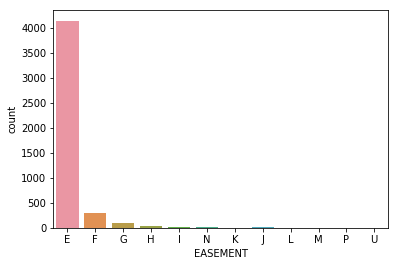

In [20]:
#easement
plot=sns.countplot(x='EASEMENT',data=mydata)

AttributeError: 'AxesSubplot' object has no attribute 'set_style'

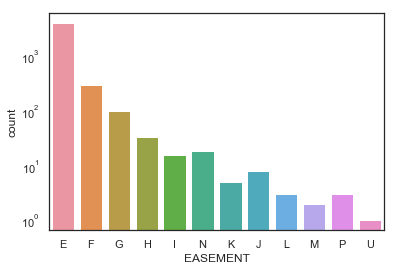

In [98]:
#easement
plot=sns.countplot(x='EASEMENT',data=mydata)
plot.set_yscale('log')
plot.set_style('white')
plt.savefig('hist_easement.png')

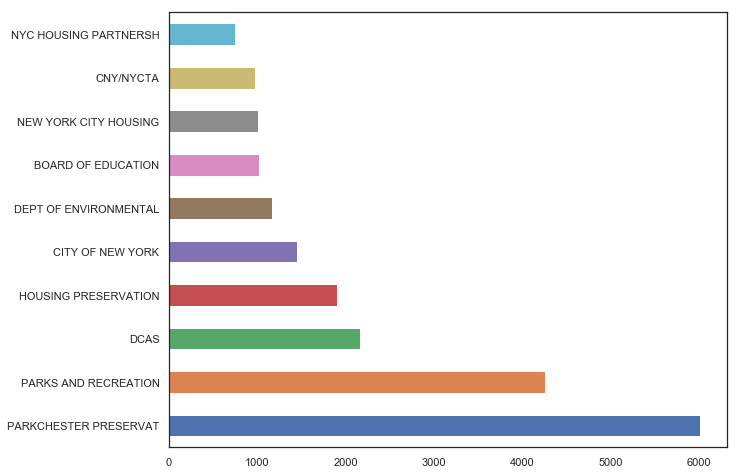

In [114]:
mydata['OWNER'].value_counts().head(10).plot.barh(figsize=(10,8))

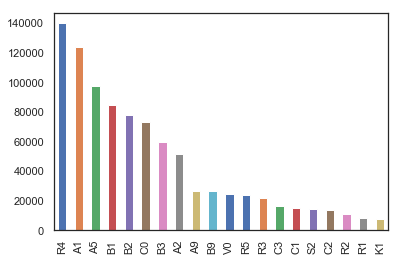

In [82]:
mydata['BLDGCL'].value_counts().head(20).plot(kind='bar')

In [116]:
len(mydata[mydata['BLDGCL']==])

0

Text(0,0.5,'Count')

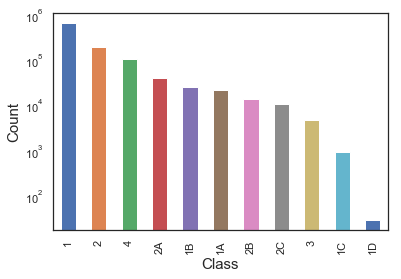

In [117]:
mydata['TAXCLASS'].value_counts().head(20).plot(kind='bar').set_yscale('log')
plt.xlabel('Class',size=15)
plt.ylabel('Count',size=15)

/Users/liana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


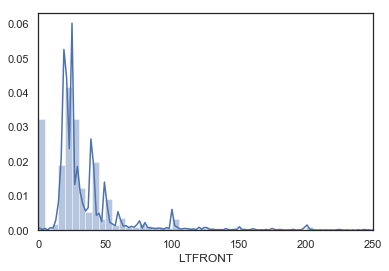

In [84]:
xhigh=250
plt.xlim(0,xhigh)
temp=mydata[mydata['LTFRONT']<= xhigh]
sns.distplot(temp['LTFRONT'],bins=50,kde=True)
plt.ylabel('')

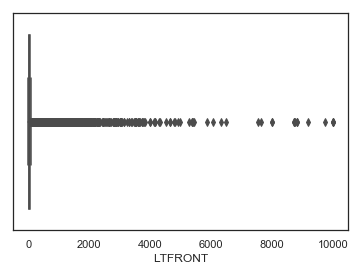

In [85]:
sns.boxplot(x='LTFRONT',data=mydata)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]), <a list of 10 Text yticklabel objects>)

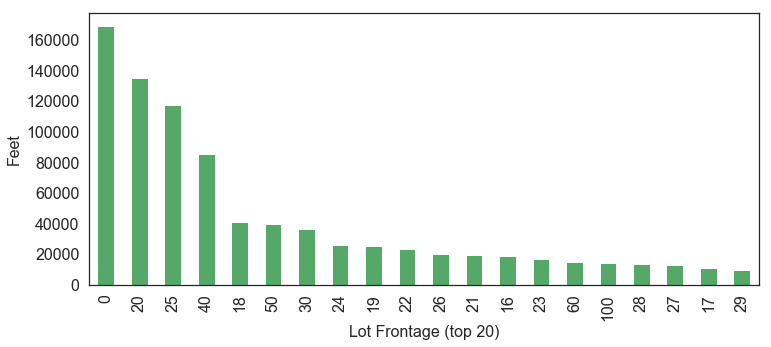

In [149]:
mydata['LTFRONT'].value_counts().head(20).plot(kind='bar',color='g',figsize=(12,5))
plt.xlabel('Lot Frontage (top 20)',size=16)
plt.ylabel('Feet',size=16)
plt.xticks(size=16)
plt.yticks(size=16)

In [6]:
len(mydata[mydata['LTDEPTH']==0])
len(mydata['LTDEPTH'].unique())
mydata[mydata['LTDEPTH']==0]

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
8,9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,636093.0,2049290.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
9,10,1000041002,1,4,1002,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,919276.0,2961617.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
10,11,1000041003,1,4,1003,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,967500.0,5483912.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
11,12,1000041004,1,4,1004,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,163174.0,525692.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
12,13,1000041005,1,4,1005,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,373783.0,1204211.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
13,14,1000041006,1,4,1006,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,353383.0,1138493.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
14,15,1000041007,1,4,1007,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,1246572.0,4016063.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
15,16,1000041008,1,4,1008,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,1213369.0,3909089.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
16,17,1000041009,1,4,1009,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,1213369.0,3909089.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR


/Users/liana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


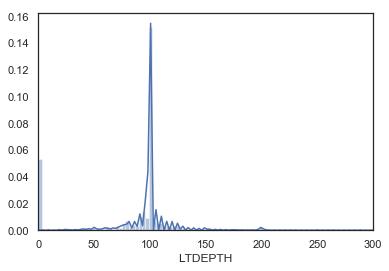

In [86]:
xhigh=300
plt.xlim(0,xhigh)
temp=mydata[mydata['LTDEPTH']<= xhigh]
sns.distplot(temp['LTDEPTH'],bins=100,kde=True)

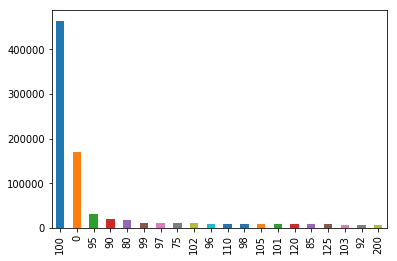

In [47]:
mydata['LTDEPTH'].value_counts().head(20).plot(kind='bar')#.set_yscale('log')

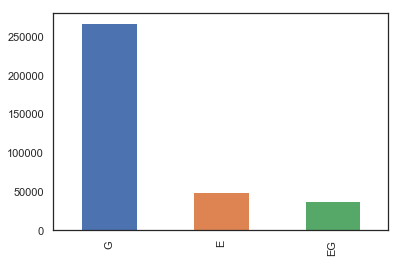

In [87]:
mydata['EXT'].value_counts().plot(kind='bar')

the maximum is 119.0


(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]), <a list of 10 Text yticklabel objects>)

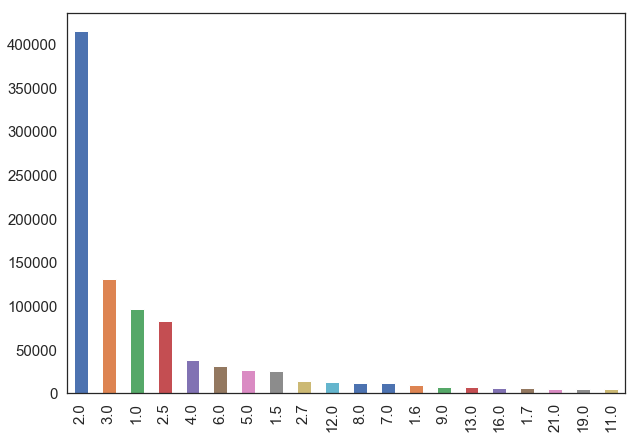

In [167]:
p1=mydata['STORIES'].value_counts().head(20).plot.bar(figsize=(10,7))
# p1=plt.figure(figsize=(200,160))
print('the maximum is',mydata['STORIES'].max())
plt.xticks(size=15)
plt.yticks(size=15)

In [168]:
p1=mydata['STORIES'].value_counts().head(10)
type(p1)
p2=pd.DataFrame({'stories':p1.index, 'count':p1.values})
p2
#p3=p2.sort(['stories'], ascending=[1])
#p3
#index = np.arange(len(p2['stories']))
#plt.bar(index, p2['count'])
#plt.xticks(index, p2['stories'], fontsize=30, rotation=30)
#plt.title('Market Share for Each Genre 1995-2017')
#plt.show()

,stories,count
0,2.0,415092
1,3.0,130127
2,1.0,96706
3,2.5,82292
4,4.0,38342
5,6.0,30936
6,5.0,25971
7,1.5,24770
8,2.7,13595
9,12.0,12198


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07, 1.e+08]), <a list of 11 Text yticklabel objects>)

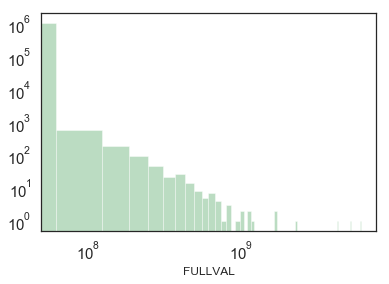

In [176]:
temp=mydata[mydata['FULLVAL']>=0]
ax=sns.distplot(temp['FULLVAL'],bins=100,kde=False,color='g')
ax.set_yscale('log')
ax.set_xscale('log')
mydata['FULLVAL'].max()
plt.xticks(size=15)
plt.yticks(size=15)

/Users/liana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


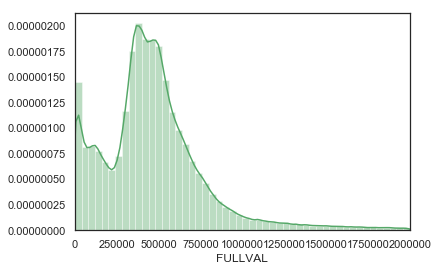

In [89]:
xhigh=2000000
plt.xlim(0,xhigh)
temp=mydata[mydata['FULLVAL']<=xhigh]
sns.distplot(temp['FULLVAL'],bins=50,kde=True,color='g')


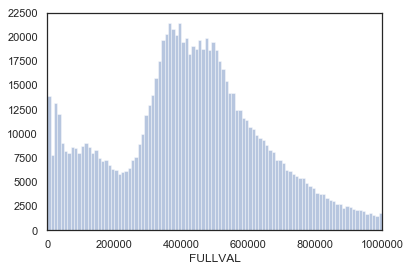

In [90]:
xhigh=1000000
plt.xlim(0,xhigh)
temp=mydata[(mydata['FULLVAL']<=xhigh)&(mydata['FULLVAL'])>0]
sns.distplot(temp['FULLVAL'],bins=100,kde=False)

/Users/liana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


2668500000.0

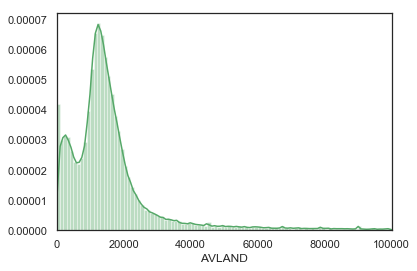

In [91]:
xhigh=100000
plt.xlim(0,xhigh)
temp=mydata[mydata['AVLAND']<=xhigh]
sns.distplot(temp['AVLAND'],bins=100,kde=True,color='g')
mydata['AVLAND'].max()

/Users/liana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


4668308947.0

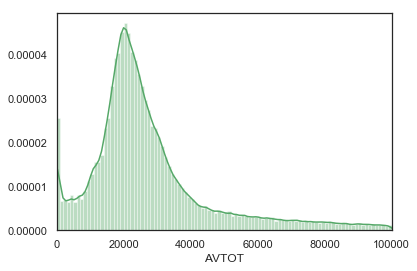

In [92]:
xhigh=100000
plt.xlim(0,xhigh)
temp=mydata[mydata['AVTOT']<=xhigh]
sns.distplot(temp['AVTOT'],bins=100,kde=True,color='g')
mydata['AVTOT'].max()

2668500000.0

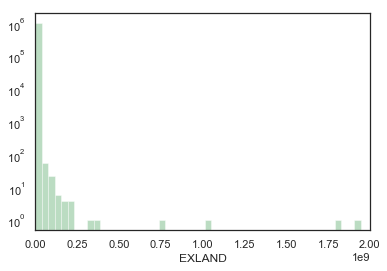

In [205]:
xhigh=2000000000
plt.xlim(0,xhigh)
temp=mydata[mydata['EXLAND']<=xhigh]
fg=sns.distplot(temp['EXLAND'],bins=50,kde=False,color='g')
fg.set_yscale('log')
#fg.set_xscale('log')
mydata['EXLAND'].max()

In [192]:
pd.DataFrame(mydata['EXLAND'].value_counts().head(40))

,EXLAND
0.0,491699
1620.0,357182
2090.0,31112
3240.0,21519
5760.0,3560
8520.0,1613
4180.0,1323
7380.0,1279
10140.0,797
72.0,437


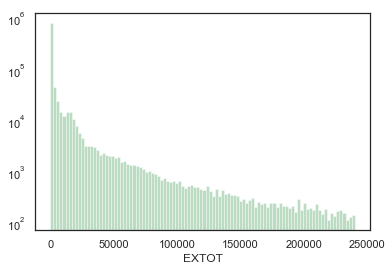

In [209]:

#temp=mydata[mydata['EXTOT']<=xhigh]
sns.distplot(temp['EXTOT'],bins=100,kde=False,color='g').set_yscale('log')

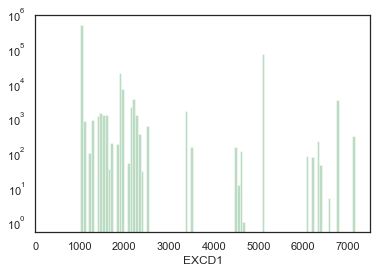

In [212]:
xhigh=7500
plt.xlim(0,xhigh)
temp=mydata[mydata['EXCD1']<=xhigh]
sns.distplot(temp['EXCD1'],bins=100,kde=False,color='g').set_yscale('log')

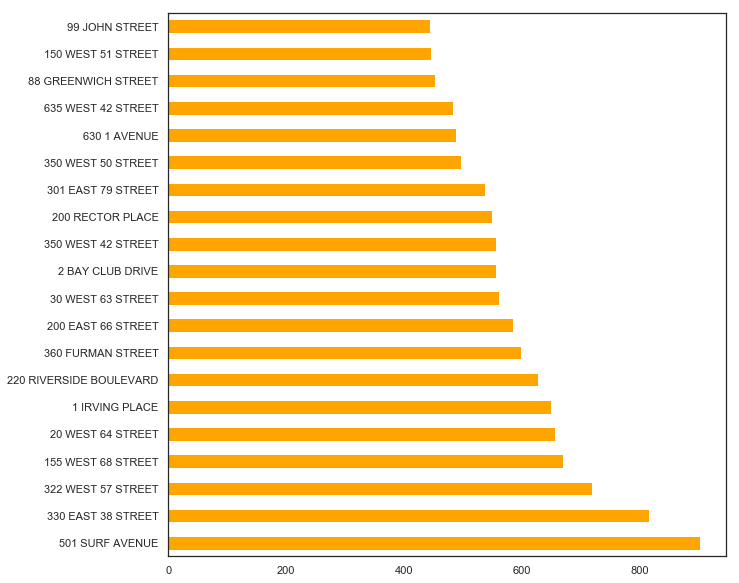

In [217]:
p4=mydata['STADDR'].value_counts().head(20)
p4.plot.barh(figsize=(10,10),color='orange')

In [223]:
mydata['ZIP'].value_counts().head(5)

10314.0    24606
11234.0    20001
10312.0    18127
10462.0    16905
10306.0    16578
Name: ZIP, dtype: int64

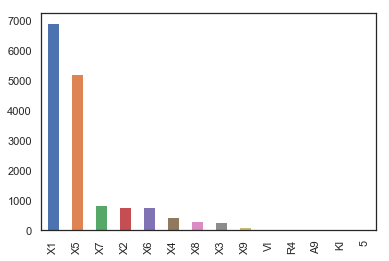

In [218]:
mydata['EXMPTCL'].value_counts().plot(kind='bar')

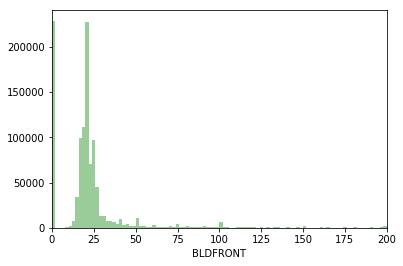

In [45]:
xhigh=200
plt.xlim(0,xhigh)
temp=mydata[mydata['BLDFRONT']<=xhigh]
sns.distplot(temp['BLDFRONT'],bins=100,kde=False,color='g')

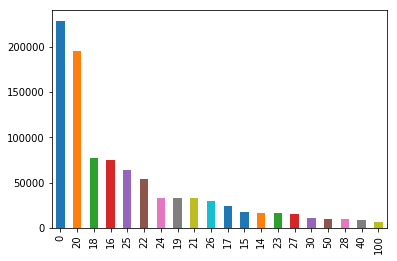

In [43]:
mydata['BLDFRONT'].value_counts().head(20).plot(kind='bar')#.set_yscale('log')

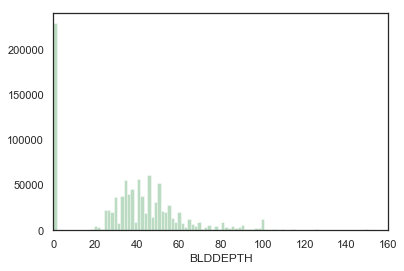

In [225]:
xhigh=160
plt.xlim(0,xhigh)
temp=mydata[mydata['BLDDEPTH']<=xhigh]
sns.distplot(temp['BLDDEPTH'],bins=100,kde=False,color='g')

Text(0,0.5,'Count')

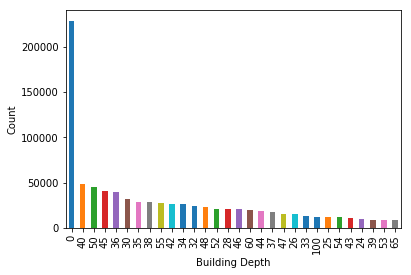

In [4]:
mydata['BLDDEPTH'].value_counts().head(30).plot(kind='bar')#.set_yscale('log')
plt.xlabel('Building Depth')
plt.ylabel('Count')

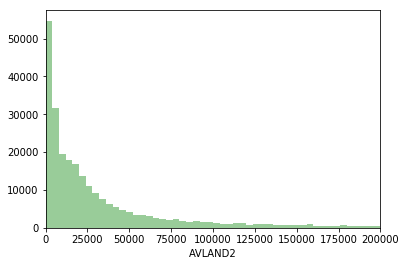

In [51]:
xhigh=200000
plt.xlim(0,xhigh)
temp=mydata[mydata['AVLAND2']<=xhigh]
sns.distplot(temp['AVLAND2'],bins=50,kde=False,color='g')

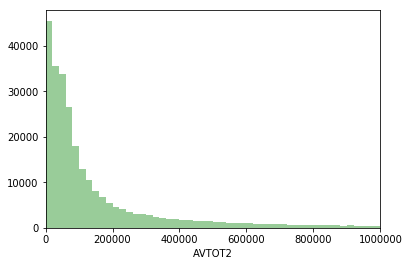

In [52]:
xhigh=1000000
plt.xlim(0,xhigh)
temp=mydata[mydata['AVTOT2']<=xhigh]
sns.distplot(temp['AVTOT2'],bins=50,kde=False,color='g')

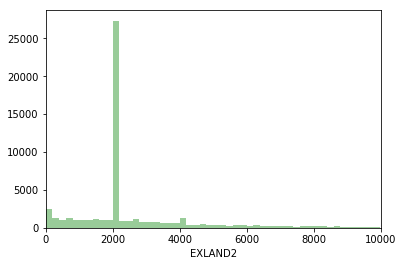

In [55]:
xhigh=10000
plt.xlim(0,xhigh)
temp=mydata[mydata['EXLAND2']<=xhigh]
sns.distplot(temp['EXLAND2'],bins=50,kde=False,color='g')

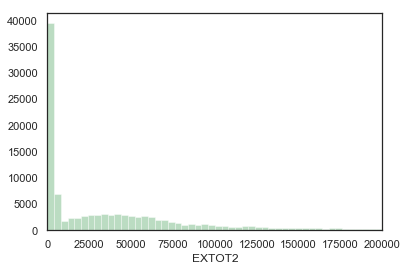

In [94]:
xhigh=200000
plt.xlim(0,xhigh)
temp=mydata[mydata['EXTOT2']<=xhigh]
sns.distplot(temp['EXTOT2'],bins=50,kde=False,color='g')

In [233]:
df=mydata['EXCD2'].value_counts().head(15)
pd.DataFrame({'EXCD2':df.index, 'count':df.values})

,EXCD2,count
0,1017.0,65777
1,1015.0,12337
2,5112.0,6867
3,1019.0,3178
4,1920.0,2961
5,1200.0,881
6,1101.0,494
7,5129.0,227
8,1986.0,35
9,1022.0,31


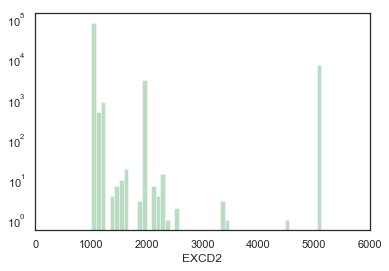

In [229]:
xhigh=6000
plt.xlim(0,xhigh)
temp=mydata[mydata['EXCD2']<=xhigh]
sns.distplot(temp['EXCD2'],bins=50,kde=False,color='g').set_yscale('log')